# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# Load Data

In [2]:
df = pd.read_csv('car_purchase_history.csv', encoding='iso-8859-1')
# encoding for european alphabets

# Explore the data

In [3]:
df.head()

,Customer Name,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


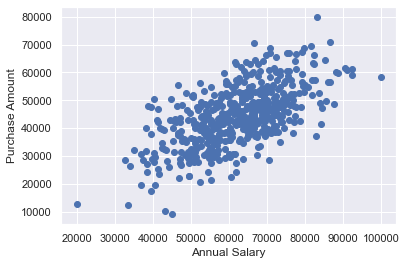

In [5]:
x1 = df['Annual Salary']
y = df['Car Purchase Amount']
plt.xlabel('Annual Salary')
plt.ylabel('Purchase Amount')
plt.scatter(x1, y)

In [6]:
x1.shape

(500,)

# Create Regression Model

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       0.382
Model:                             OLS   Adj. R-squared:                  0.381
Method:                  Least Squares   F-statistic:                     307.5
Date:                 Fri, 11 Sep 2020   Prob (F-statistic):           5.76e-54
Time:                         21:26:32   Log-Likelihood:                -5231.2
No. Observations:                  500   AIC:                         1.047e+04
Df Residuals:                      498   BIC:                         1.047e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8874.7295   2050.398      4.328      0.000    4846.232    1.29e+04
Annual Salary     0.5688      0.032     17.536      0.000       0.505       0.632
==============================================================================
Omnibus:                        2.853   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.928
Skew:                           0.169   Prob(JB):                        0.231
Kurtosis:                       2.839   Cond. No.                     3.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

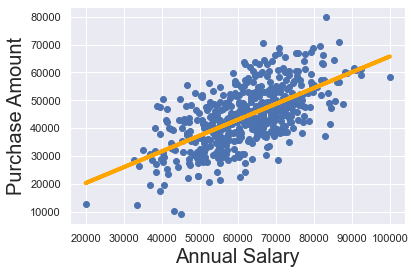

In [8]:
plt.scatter(x1,y)
yhat = 0.5688 * x1 + 8874.7295
plt.plot(x1, yhat, lw=4, c='orange')
plt.xlabel('Annual Salary', fontsize = 20)
plt.ylabel('Purchase Amount', fontsize = 20)
plt.show()

# Predict the purchase amount

In [9]:
salary = 70000
predict_amount = 0.5688 * salary + 8874.7295
print('Predicted purchase amount: ', predict_amount)

Predicted purchase amount:  48690.7295


# GENDER ANALYSIS

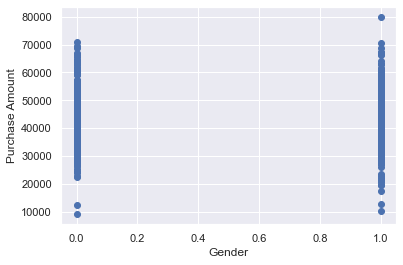

In [10]:
x2 = df['Gender']
y = df['Car Purchase Amount']
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.scatter(x2, y)

In [11]:
x2.shape

(500,)

# Create Regression Model

In [12]:
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     2.206
Date:                 Fri, 11 Sep 2020   Prob (F-statistic):              0.138
Time:                         21:26:33   Log-Likelihood:                -5350.3
No. Observations:                  500   AIC:                         1.070e+04
Df Residuals:                      498   BIC:                         1.071e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.493e+04    684.654     65.629      0.000    4.36e+04    4.63e+04
Gender     -1429.5113    962.490     -1.485      0.138   -3320.552     461.529
==============================================================================
Omnibus:                        1.400   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.252
Skew:                          -0.015   Prob(JB):                        0.535
Kurtosis:                       3.243   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

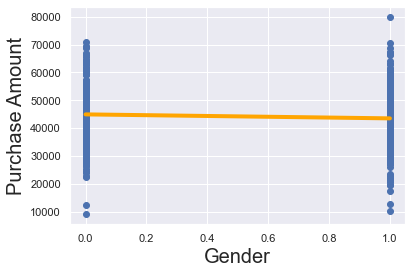

In [13]:
plt.scatter(x2,y)
yhat = -1429.5113 * x2 + 4.493e+04
plt.plot(x2, yhat, lw=4, c='orange')
plt.xlabel('Gender', fontsize = 20)
plt.ylabel('Purchase Amount', fontsize = 20)
plt.show()

# Predict Purchase Price

In [14]:
#male = 0
#female = 1
gender = 0
predict_amount = -1429.5113 * gender + 4.493e+04
print('Predicted purchase amount: ', predict_amount)

Predicted purchase amount:  44930.0


In [15]:
gender = 1
predict_amount = -1429.5113 * gender + 4.493e+04
print('Predicted purchase amount: ', predict_amount)

Predicted purchase amount:  43500.4887


# AGE ANALYSIS

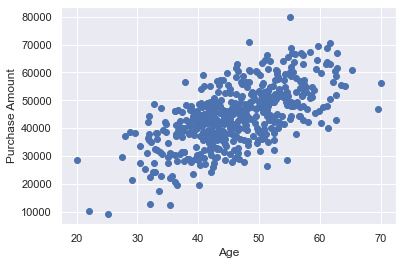

In [16]:
x3 = df['Age']
y = df['Car Purchase Amount']
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.scatter(x3, y)

In [17]:
x3.shape

(500,)

# Create Regression Model

In [18]:
x = sm.add_constant(x3)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       0.401
Model:                             OLS   Adj. R-squared:                  0.399
Method:                  Least Squares   F-statistic:                     332.7
Date:                 Fri, 11 Sep 2020   Prob (F-statistic):           2.61e-57
Time:                         21:26:34   Log-Likelihood:                -5223.5
No. Observations:                  500   AIC:                         1.045e+04
Df Residuals:                      498   BIC:                         1.046e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4696.1403   2198.205      2.136      0.033     377.242    9015.039
Age          854.5032     46.846     18.241      0.000     762.462     946.544
==============================================================================
Omnibus:                        0.311   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.423
Skew:                           0.031   Prob(JB):                        0.809
Kurtosis:                       2.872   Cond. No.                         276.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

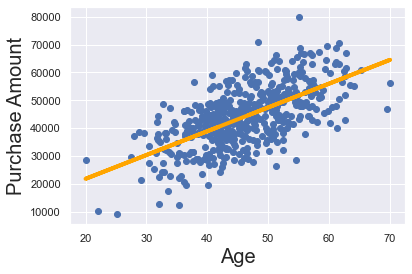

In [19]:
plt.scatter(x3,y)
yhat = 854.5032 * x3 + 4696.1403
plt.plot(x3, yhat, lw=4, c='orange')
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Purchase Amount', fontsize = 20)
plt.show()

# Predict Purchase Price

In [20]:
age = 40
predict_amount = 854.5032 * age + 4696.1403
print('Predicted purchase amount: ', predict_amount)

Predicted purchase amount:  38876.268299999996


# CREDIT CARD DEBT ANALYSIS

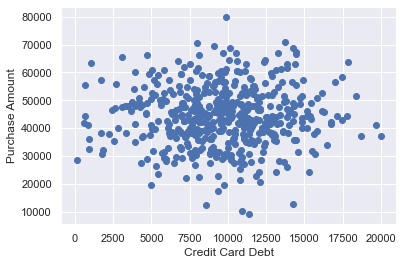

In [21]:
x4 = df['Credit Card Debt']
y = df['Car Purchase Amount']
plt.xlabel('Credit Card Debt')
plt.ylabel('Purchase Amount')
plt.scatter(x4, y)

In [22]:
x4.shape

(500,)

# Create Regression Model

In [23]:
x = sm.add_constant(x4)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.4158
Date:                 Fri, 11 Sep 2020   Prob (F-statistic):              0.519
Time:                         21:26:35   Log-Likelihood:                -5351.2
No. Observations:                  500   AIC:                         1.071e+04
Df Residuals:                      498   BIC:                         1.071e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.335e+04   1413.488     30.671      0.000    4.06e+04    4.61e+04
Credit Card Debt     0.0892      0.138      0.645      0.519      -0.183       0.361
==============================================================================
Omnibus:                        1.257   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.080
Skew:                          -0.034   Prob(JB):                        0.583
Kurtosis:                       3.217   Cond. No.                     3.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

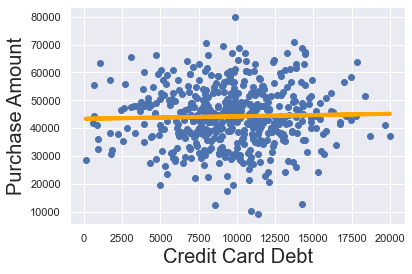

In [24]:
plt.scatter(x4,y)
yhat = 0.0892 * x4 + 4.335e+04
plt.plot(x4, yhat, lw=4, c='orange')
plt.xlabel('Credit Card Debt', fontsize = 20)
plt.ylabel('Purchase Amount', fontsize = 20)
plt.show()

# Predict Purchase Price

In [25]:
credit_card_debt = 6000
predict_amount = 0.0892 * credit_card_debt + 4.335e+04
print('Predicted purchase amount: ', predict_amount)

Predicted purchase amount:  43885.2


# NET WORTH ANALYSIS

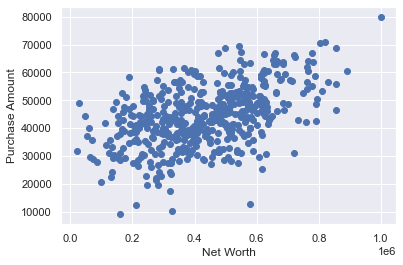

In [26]:
x5 = df['Net Worth']
y = df['Car Purchase Amount']
plt.xlabel('Net Worth')
plt.ylabel('Purchase Amount')
plt.scatter(x5, y)

In [27]:
x5.shape

(500,)

# Create Regression Model

In [28]:
x = sm.add_constant(x5)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       0.239
Model:                             OLS   Adj. R-squared:                  0.237
Method:                  Least Squares   F-statistic:                     156.2
Date:                 Fri, 11 Sep 2020   Prob (F-statistic):           2.33e-31
Time:                         21:26:36   Log-Likelihood:                -5283.2
No. Observations:                  500   AIC:                         1.057e+04
Df Residuals:                      498   BIC:                         1.058e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.112e+04   1128.669     27.575      0.000    2.89e+04    3.33e+04
Net Worth      0.0303      0.002     12.496      0.000       0.026       0.035
==============================================================================
Omnibus:                        3.707   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.485
Skew:                          -0.178   Prob(JB):                        0.175
Kurtosis:                       3.202   Cond. No.                     1.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

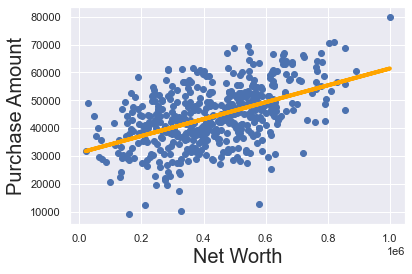

In [29]:
plt.scatter(x5,y)
yhat = 0.0303 * x5 + 3.112e+04
plt.plot(x5, yhat, lw=4, c='orange')
plt.xlabel('Net Worth', fontsize = 20)
plt.ylabel('Purchase Amount', fontsize = 20)
plt.show()

# Predict Purchase Price

In [30]:
net_worth = 500000
predict_amount = 0.0303 * net_worth + 3.112e+04
print('Predicted purchase amount: ', predict_amount)

Predicted purchase amount:  46270.0
